In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
from scipy.io import loadmat

In [3]:
# Load sample ECG data from the downloaded MATLAB file
mat = loadmat('Sample_Data/ECGData.mat')

raw_data = mat['ECGData'][0][0]

df = pd.DataFrame([label[0][0] for label in raw_data[1]], columns=['Label'])
df['Data'] = [d for d in raw_data[0]]
df

,Label,Data
0,ARR,"[-0.09785730141312626, -0.15688125766870917, -..."
1,ARR,"[0.11936110212935253, 0.1875585252797226, 0.16..."
2,ARR,"[-0.024601752866021002, -0.03627935093876371, ..."
3,ARR,"[-0.5083094831172177, -0.8080090754056968, -0...."
4,ARR,"[-0.3120394092314903, -0.49525996206816025, -0..."
...,...,...
157,NSR,"[-0.075, -0.165, -0.225, -0.175, -0.225, -0.22..."
158,NSR,"[-0.185, -0.155, -0.145, -0.135, -0.105, -0.09..."
159,NSR,"[-0.355, -0.355, -0.345, -0.335, -0.335, -0.34..."
160,NSR,"[-0.275, -0.245, -0.285, -0.265, -0.235, -0.21..."


In [14]:
# Grab the first ARR, CHF, and NSR ECGs in the data
ARR = df['Data'][(df['Label'] == 'ARR').argmax()]
CHF = df['Data'][(df['Label'] == 'CHF').argmax()]
NSR = df['Data'][(df['Label'] == 'NSR').argmax()]

# data_dict now contains three ECGs: ARR, CHF, NSR
data_dict = {
    'ARR': ARR,
    'CHF': CHF,
    'NSR': NSR
}

# Generate time array for ECGs (each tick is 1/128 second)
time = np.arange(0,len(ARR))/128

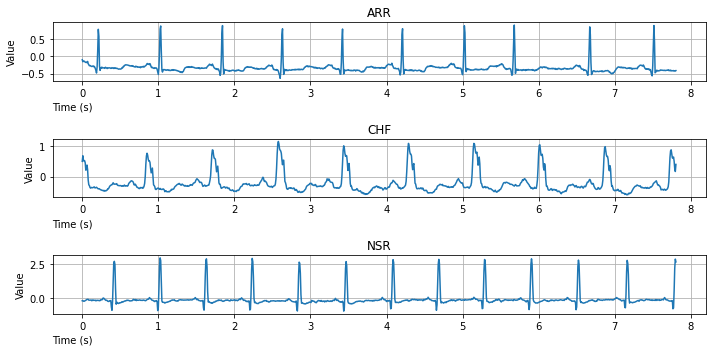

In [23]:
# Plot the three ECGs (first 1000 points)
fig, axes = plt.subplots(len(data_dict), 1, figsize=(10, 5))
for i, (key, arr) in enumerate(data_dict.items()):
    axes[i].plot(time[0:1000], arr[0:1000])
    axes[i].set_ylabel('Value')
    axes[i].set_xlabel('Time (s)', loc='left')
    axes[i].set_title(key)
    axes[i].grid()

plt.tight_layout()

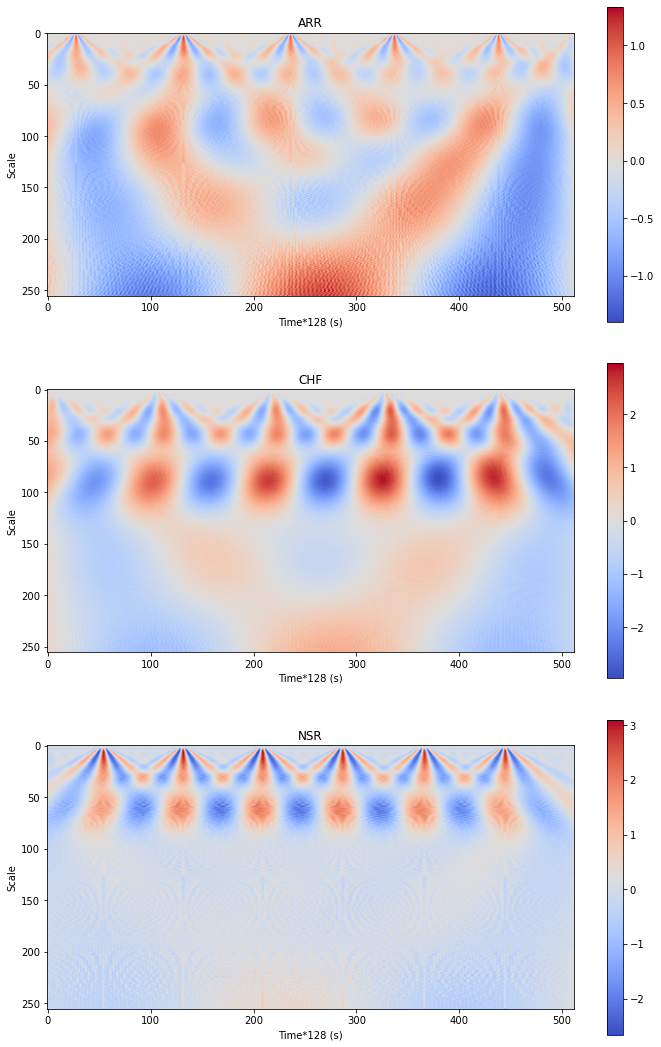

In [32]:
# Generate and Plot the three ECGs
num_steps = 256
scales = np.arange(1, num_steps+1)
wavelet_type = 'morl' # https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (key, arr) in enumerate(data_dict.items()):
    coefs, freqs = pywt.cwt(arr[0:512], scales, wavelet_type)
    im = axes[i].imshow(coefs, cmap='coolwarm')
    plt.colorbar(im, ax=axes[i])
    axes[i].set_xlabel('Time*128 (s)')
    axes[i].set_ylabel('Scale')
    axes[i].set_title(key)

plt.tight_layout()